<a href="https://colab.research.google.com/github/priya1016/NLP/blob/main/17_neural_nets--I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 17. Neural Networks

## Agenda

1. Feedforward Neural Networks
2. Neural Language Models
3. Computational Graphs
4. Backpropagation

## Learning Objectives

By the end of the lecture you should able to:
1. Explain the differences between linear models such as logistic regression and neural networks
2. Identify the main components of a feedforwad neural network
3. Explain how feedforward neural language models work
4. Describe the backpropagation algorithm


## Readings

Book Chapters: 

- 7. Neural Networks and Neural Language Models


**Attribution**: _This notebook is based on materials created by Prof Felix Muzny for a previous offering of the course_



# Lecture Activities 

Feel free to add cells to this notebook as you wish. Make sure to keep **code** and any **answers to questions** that you've written and turn in your notebook as a pdf at the end of the lecture. If you have not finished the exercises, don't worry, you can keep working on them until the end of the week.

All lecture notebooks for a given week must be submitted to Gradescope by **11 pm on Sundays**.

### Notebook submission

Follow these steps to convert your notebook into a pdf for submission: 
1. Kernel -> Restart & Run All (clear your kernel's memory and run all cells)
2. File -> Download As -> .html -> open in a browser -> print to pdf

(The download as pdf option doesn't preserve formatting and output as nicely as taking the step "through" html, but will do if the above doesn't work for you.)

### Add your name here

Task 1: Writing a neural net from scratch
-----------------
Go through the code below and answer the following questions:
(For your reference, comments have been added in the code block according to the question numbers)

1. What logical function does this dataset represent? (remember that this function should apply to two inputs (our two input features and produce the matching label)

  __XOR__

2. Does the hidden layer have a bias term in this neural net? 

  __YES__

3. What variables' values are updated as the loop above iterates? 

  __W,U__

4. How many iterations did you need for the predicted values $\hat y$ to match the actual values?

 __5000__

5. Make a graph of how the `layer2_error` changes as epochs progress.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

%matplotlib inline
# seed random number generation so that you can 
# track the same numbers as each other
np.random.seed(42)

In [2]:
def sigmoid(x: float) -> float:
    """
    Apply the sigmoid function (1 / (1 + e^(-x)))
    to the passed in value.
    Parameters:
        x - float value to pass through sigmoid
    Return:
    float in [0, 1]
    """
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x: float) -> float:
    """
    Apply the derivative of the sigmoid function
    sigmoid(x) * (1 - sigmoid(x))
    to the passed in value.
    Parameters:
        x - float value to pass through sigmoid derivative
    Return:
    float result
    """
    return sigmoid(x) * (1 - sigmoid(x))

In [3]:
# ANSWER QUESTION 1 FROM HERE

# input dataset
# 3rd "feature" is the bias term
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# labels, transposed so that they match
# easily with our inputs X
# the first label matches the first row in our input data,
# the second label matches the second row in our input data, etc
# .T gets the transpose for us, which makes 
# matrix math easier later
y = np.array([[0,1,1,0]]).T

In [4]:
X.shape

(4, 3)

Before answering questions 2 & 3, complete the following :

Task 1.1 : Fill in dimensions for W and U. Fill these in as a tuple like (rows, columns)

In [5]:
# ANSWER QUESTIONS 2 & 3 FROM HERE

hidden_units = 4
input_features = X.shape[1]

# initialize weights randomly with mean 0 and range [-1, 1]

# Task 1.1
W_dim = (input_features, hidden_units)

# you'll need to use W_dim and U_dim to produce the correct number of random numbers
W = 2 * np.random.random(W_dim) - 1

# note that we are doing binary classification, so the second dimension here is 1 
# (corresponding to one output unit)
U_dim = (hidden_units, 1)
U = 2 * np.random.random(U_dim) - 1
print("W:", W)
print("U:", U)

layer2_error_ls = []
inputs = X
num_epochs = 5000
for i in range(num_epochs):
    # forward propagation—sigmoid
    h = sigmoid(np.dot(inputs,W))
    
    # always sigmoid—classification
    y_hat = sigmoid(np.dot(h,U))

    # how much did we miss?
    layer2_error = y - y_hat
    layer2_error_ls.append(np.linalg.norm(layer2_error))

    # this is telling us how much to move
    # our weights and in what direction
    # use the corresponding derivative to the non-linearity used above
    layer2_delta = layer2_error * sigmoid_deriv(y_hat)
    
    # how much did each L1 value contribute to 
    # the L2 error (according to the weights)?
    layer1_error = layer2_delta.dot(U.T)
    
    # this is telling us how much to move
    # our weights and in what direction
    layer1_delta = layer1_error * sigmoid_deriv(h)

    U += h.T.dot(layer2_delta)
    W += inputs.T.dot(layer1_delta)

W: [[-0.25091976  0.90142861  0.46398788  0.19731697]
 [-0.68796272 -0.68801096 -0.88383278  0.73235229]
 [ 0.20223002  0.41614516 -0.95883101  0.9398197 ]]
U: [[ 0.66488528]
 [-0.57532178]
 [-0.63635007]
 [-0.63319098]]


Before answering questions 4 & 5, complete the following:

Task 1.2 : Write the code to assign labels to the test data. Fill in values for variables 'h' and 'y_hat' in the code below.

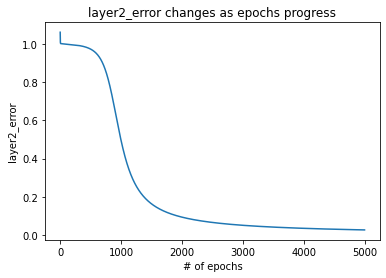

In [6]:
plt.plot(layer2_error_ls)
plt.title("layer2_error changes as epochs progress")
plt.xlabel('# of epochs')
plt.ylabel('layer2_error')
plt.show()

In [7]:
# ANSWER QUESTIONS 4 & 5 FROM HERE

print("Output After Training:")
# these are the same as the inputs that we trained this net on
test_inputs = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
gold_labels = np.array([[0,1,1,0]]).T

# Task 1.2
h = sigmoid(np.dot(test_inputs,W))
y_hat = sigmoid(np.dot(h,U))


# These should match with each other
# y was our gold labels from the beginning
print("Actual labels:", gold_labels.T)
print("Assigned probabilities:", y_hat)
print("Assigned labels:", [1 if y_hat_val > .5 else 0 for y_hat_val in y_hat])

Output After Training:
Actual labels: [[0 1 1 0]]
Assigned probabilities: [[0.01142876]
 [0.9864928 ]
 [0.98418635]
 [0.01159438]]
Assigned labels: [0, 1, 1, 0]


Task 2: Neural Nets from libraries
----------------

Now, we'll take a look at some common libraries used to create classifiers using neural nets. We'll take a look at [`keras`](https://keras.io/) which provides a nice API for implementing neural nets and can be run on top of TensorFlow, CNTK, or Theano. We'll look at an example using [`tensorflow`](https://github.com/tensorflow/tensorflow) as our backend.

Installation of component libraries:

```
pip3 install tensorflow
sudo pip3 install keras
```

Go through the code below and answer the following questions:

(For your reference, comments have been added in the code block according to the question numbers)

6. How many epochs did you need for 100% accuracy? 

  __4501__

In [8]:
from keras.models import Sequential
from keras.layers import Dense
import keras.callbacks

In [18]:
class myCallback(keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy')>=1.0  ):
			print("\nReached 100% accuracy so cancelling training! on ",epoch," epochs")
			self.model.stop_training = True

callbacks = myCallback()

In [19]:
# set up the basis for a feed forward network
model = Sequential()

# same X and y as above
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
y = np.array([[0,1,1,0]]).T

# hidden layer
# you can play around with different activation functions
model.add(Dense(units=4, activation='relu', input_dim=X.shape[1]))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

# configure the learning process
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X, y, epochs=5000, verbose=0, callbacks=[callbacks])


Reached 100% accuracy so cancelling training! on  4501  epochs


In [20]:
x_test = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
y_test = np.array([[0,1,1,0]]).T
labels = model.predict(x_test)
print("Assigned probabilities:", labels)
print("Assigned labels:", [1 if y_hat_val > .5 else 0 for y_hat_val in labels])

1/1 [==============================] - 0s 47ms/step
Assigned probabilities: [[0.03666909]
 [0.50034505]
 [0.94684094]
 [0.4999936 ]]
Assigned labels: [0, 1, 1, 0]
